## This example jupyer notebook uses clmm code to generate mock data with a set of configuration parameters, producing a catalog of ideal and noisy example data.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import mock data module and setup the configuration 

In [19]:
import sys
sys.path.append('./support')
sys.path.append('../clmm')

In [20]:
import pyccl as ccl
import mock_data as mock
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Mock data generation requires a config dictionary

In [21]:
config={}
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['cosmo'] = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)
config['ngals'] = 10000
config['Delta'] = 200

ideal_data = mock.MockData(config=config)
noisy_data = mock.MockData(config=config)
noisy_data_z = mock.MockData(config=config)

### Generate the mock catalog from the configuration. Consider 3 examples of increasing complexity:
* Ideal data, no noise, all galaxies at the same redshift
* Noisy data, including shape noise and redshift error, all galaxies at the same redshift
* Noisy data, galaxies following redshift distribution, redshift error, shape noise

In [22]:
ideal_data.generate()
noisy_data.generate(is_shapenoise=True, shapenoise=0.005, is_zerr=True)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)


#### Ideal catalog first entries: no noise on the shape measurement, all galaxies at z=0.3

In [23]:
ideal_data.catalog[0:10]

id,ra,dec,gamma1,gamma2,z
int64,float64,float64,float64,float64,float64
0,0.2269807890605919,-0.2239751397523126,-3.584272438431787e-05,-0.002688732013719334,0.8
1,0.013786083281548135,-0.15775304172270155,0.00645536054724799,-0.0011369545890725149,0.8
2,-0.19273669055404413,0.008070039479127732,-0.005156450737443439,-0.0004325678003452333,0.8
3,0.14288285276373064,0.04556029986956461,-0.005691794492800653,0.004040657497651568,0.8
4,-0.04826181090754961,-0.07633904838532349,0.005111208074606686,0.010765358571287648,0.8
5,-0.2170471606224419,-0.19648288454861174,-0.00029962285524168583,0.0030051300666743253,0.8
6,0.03654090012631307,0.17862928094352654,0.005098001064085022,0.0021768131793842454,0.8
7,0.0345161026246047,-0.131854524734967,0.006779333885287209,-0.003810420038342519,0.8
8,-0.19014815828927442,-0.06902686792343762,-0.0037430537967946763,0.003130060383387683,0.8


#### More realistic catalog: noise has been added on the shape measurement, galaxies follow some photoz distribution, gaussian pdf for each photoz is also provided (along with corresponding bins)

In [24]:
noisy_data.catalog[0:2]

id,ra,dec,gamma1,gamma2,z,z_pdf [34],z_bins [34]
int64,float64,float64,float64,float64,float64,float64,float64
0,-0.19199817206440348,0.2034069401358791,-1.8186550172480224e-05,0.0003148923789720752,0.8,8.80221998747802e-07 .. 1.6217891916506561e-06,0.30000000000000004 .. 1.290000000000001
1,0.11367461670448151,-0.0816704495360721,-0.002291783461734378,-0.006806487389498723,0.8,8.80221998747802e-07 .. 1.6217891916506561e-06,0.30000000000000004 .. 1.290000000000001


In [15]:
noisy_data_z.catalog[0:2]

id,ra,dec,gamma1,gamma2,z,z_pdf [34],z_bins [34]
int64,float64,float64,float64,float64,float64,float64,float64
0,0.23835016723420904,-0.06335902990930695,0.00619454849384011,0.003543716983582927,2.156515302067909,0.016723388489610858 .. 0.020399937218747183,1.656515302067909 .. 2.64651530206791
1,-0.14430028653554777,0.17081220305922337,0.00106824869087619,-0.00630349934271347,1.1784312850926948,9.727493031469643e-05 .. 0.00014763945078423522,0.6784312850926948 .. 1.6684312850926957


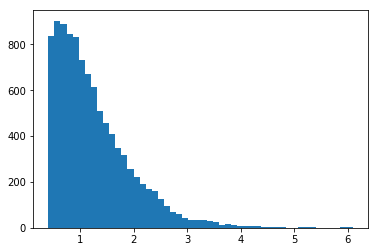

In [16]:
# Histogram of the redshift distribution of bkg galaxies (starting at z_cluster + 0.1)
hist = plt.hist(noisy_data_z.catalog['z'], bins=50)

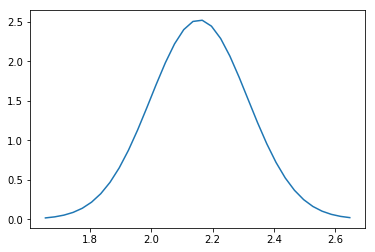

In [17]:
# pdz for the first galaxy in the catalog
plt.plot(noisy_data_z.catalog['z_bins'][0],noisy_data_z.catalog['z_pdf'][0])

### Compute and plot shear profile

In [13]:
from clmm import ShearAzimuthalAverager

ImportError: cannot import name 'ShearAzimuthalAverager'

In [ ]:
cl_dict = {'z':config['cluster_z'], 'ra':0.0, 'dec': 0.0}

saa_ideal = ShearAzimuthalAverager(cl_dict,ideal_data.catalog)
saa_noisy = ShearAzimuthalAverager(cl_dict,noisy_data.catalog)
saa_noisy_z = ShearAzimuthalAverager(cl_dict,noisy_data_z.catalog)


saa_ideal.compute_shear()
saa_noisy.compute_shear()
saa_noisy_z.compute_shear()

saa_ideal.make_shear_profile()
saa_noisy.make_shear_profile()
saa_noisy_z.make_shear_profile()

In [ ]:
# Ideal data
saa_ideal.plot_profile()

In [ ]:
# Noisy data, all galaxies at the same redshift
saa_noisy.plot_profile()

In [ ]:
# Noisy data, galaxies following redshift distribution
saa_noisy_z.plot_profile()